# Problem 1

## a > Updating rows

In [0]:
import pandas as pd
import numpy as np
from scipy import linalg
import scipy.stats as st

In [0]:
df = pd.read_csv(r"C:\Users\anmol\Downloads\charlie.csv")

In [0]:
df = df[['x1', 'x2', 'x3', 'x4']]
X = np.array(df)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [0]:
x_test = X[0:4,:]
print(x_test)

[[10.  20.7 13.6 15.5]
 [10.5 19.9 18.1 14.8]
 [ 9.7 20.  16.1 16.5]
 [ 9.8 20.2 19.1 17.1]]


In [0]:
n_rows, n_cols = x_test.shape
print(n_rows,n_cols)

4 4


In [0]:
updates = X[4:-1,:]

In [0]:
def Givens(a, b):
    if b == 0:
        c = 1
        s = 0
    elif np.abs(b) >= np.abs(a):
        t = -a/b
        s = 1/np.sqrt(1 + t**2)
        c = s*t
    else:
        t = -b/a
        c = 1/np.sqrt(1 + t**2)
        s = c*t
    return c, s


In [0]:
def update_rows(Q, R, u, data):
    next_row = u
    n_rows, n_cols = data.shape
    for j in range(n_cols):
        c, s  = Givens(R[j,j], next_row[j])
        R[j, j] = c*R[j, j] - s*next_row[j]
        #Update jth row of R and u
        t1 = R[j, j+1:n_cols]
        t2 = next_row[j + 1:n_cols]
        R[j, j+1:n_cols] = c*t1 - s*t2
        next_row[j+1:n_cols] = s*t1 + c*t2
    R_up = np.zeros((len(data)+1, len(data)+1))
    R_up[0:len(data), 0:len(data)] = R
#     R_up.shape
    
    m, n = Q.shape
    Q_up = np.zeros((m+1, m+1))
    Q_up[-1][-1] = 1
    Q_up[0:m, 0:m] = Q
    for j in range(n_cols):
        c, s = Givens(R[j, j], next_row[j])
        t1 = Q_up[0:m+1, j]
        t2 = Q_up[0:m+1, m]
        Q_up[0:m+1, j] = c*t1 - s*t2
        Q_up[0:m+1, m] = s*t1 + c*t2
    Q_up.shape
    
    data = np.vstack([data, np.zeros(n_cols)])
    data[-1] = u
    
#     A = np.delete(A, -1, 1)
#     print(A - data)
    print("Q update :", Q_up)
    print("R update: ", R_up)
#     print(np.dot(Q_up, R_up) - data)
    return Q_up, R_up

In [0]:
x_test

array([[10. , 20.7, 13.6, 15.5],
       [10.5, 19.9, 18.1, 14.8],
       [ 9.7, 20. , 16.1, 16.5],
       [ 9.8, 20.2, 19.1, 17.1]])

In [0]:
Q_up, R_up = np.linalg.qr(x_test)
nc=4

In [0]:
for i in range(4, len(X)):
    Q_up, R_up = update_rows(Q_up, R_up, X[i], x_test)
    A = np.dot(Q_up, R_up)
    r, c = np.shape(A)
    while c != nc:
        A = np.delete(A, -1, 1)
        c = c-1
    c = nc
    print("A: ",A)
    x_test = np.vstack([x_test, np.zeros(nc)])
    x_test[-1] = df.iloc[i,:]
    print("X_test = ", x_test, "\n")

Q update : [[-0.13802532  0.15613408  0.07206437 ... -0.04385967 -0.08160296
   0.08907631]
 [-0.14492658 -0.3690783   0.16227286 ... -0.04349659  0.07879631
  -0.18767628]
 [-0.13388456  0.12850264 -0.18449905 ...  0.02404815 -0.0716289
   0.05083207]
 ...
 [-0.15827532  0.02844674  0.2314337  ...  0.87250926 -0.03380239
   0.02464166]
 [-0.11908655  0.20262748  0.04429196 ...  0.          0.86198827
   0.11137467]
 [-0.14173917 -0.51849484 -0.073928   ...  0.          0.
   0.51868778]]
R update:  [[ -81.71260613 -153.76288103 -104.03053437 ...    0.
     0.            0.        ]
 [   0.           36.27032779   18.14377352 ...    0.
     0.            0.        ]
 [   0.            0.          -26.05287269 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.    

 [ 9.93467168  1.25195292  1.18565246  1.78747093]]
X_test =  [[10.  20.7 13.6 15.5]
 [10.5 19.9 18.1 14.8]
 [ 9.7 20.  16.1 16.5]
 [ 9.8 20.2 19.1 17.1]
 [11.7 21.5 19.8 18.3]
 [11.  20.9 10.3 13.8]
 [ 8.7 18.8 16.9 16.8]
 [ 9.5 19.3 15.3 12.2]
 [10.1 19.4 16.2 15.8]
 [ 9.5 19.6 13.6 14.5]
 [10.5 20.3 17.  16.5]
 [ 9.2 19.  11.5 16.3]
 [11.3 21.6 14.  18.7]
 [10.  19.8 14.  15.9]
 [ 8.5 19.2 17.4 15.8]
 [ 9.7 20.1 10.  16.6]
 [ 8.3 18.4 12.5 14.2]
 [11.9 21.8 14.1 16.2]
 [10.3 20.5 15.6 15.1]
 [ 8.9 19.   8.5 14.7]
 [ 9.9 20.  15.4 15.9]
 [ 8.7 19.   9.9 16.8]
 [11.5 21.8 19.3 12.1]
 [15.9 24.6 14.7 15.3]
 [12.6 23.9 17.1 14.2]
 [14.9 25.  16.3 16.6]
 [ 9.9 23.7 11.9 18.1]
 [12.8 26.3 13.5 13.7]
 [13.1 26.1 10.9 16.8]
 [ 9.8 25.8 14.8 15. ]
 [11.7 21.5 19.8 18.3]
 [11.  20.9 10.3 13.8]
 [ 8.7 18.8 16.9 16.8]
 [ 9.5 19.3 15.3 12.2]
 [10.1 19.4 16.2 15.8]
 [ 9.5 19.6 13.6 14.5]
 [10.5 20.3 17.  16.5]
 [ 9.2 19.  11.5 16.3]
 [11.3 21.6 14.  18.7]
 [10.  19.8 14.  15.9]
 [ 8.5 19.2 17.4 1

 [ 8.66066899  2.32387224 -2.35388562  3.73923875]]
X_test =  [[10.  20.7 13.6 15.5]
 [10.5 19.9 18.1 14.8]
 [ 9.7 20.  16.1 16.5]
 [ 9.8 20.2 19.1 17.1]
 [11.7 21.5 19.8 18.3]
 [11.  20.9 10.3 13.8]
 [ 8.7 18.8 16.9 16.8]
 [ 9.5 19.3 15.3 12.2]
 [10.1 19.4 16.2 15.8]
 [ 9.5 19.6 13.6 14.5]
 [10.5 20.3 17.  16.5]
 [ 9.2 19.  11.5 16.3]
 [11.3 21.6 14.  18.7]
 [10.  19.8 14.  15.9]
 [ 8.5 19.2 17.4 15.8]
 [ 9.7 20.1 10.  16.6]
 [ 8.3 18.4 12.5 14.2]
 [11.9 21.8 14.1 16.2]
 [10.3 20.5 15.6 15.1]
 [ 8.9 19.   8.5 14.7]
 [ 9.9 20.  15.4 15.9]
 [ 8.7 19.   9.9 16.8]
 [11.5 21.8 19.3 12.1]
 [15.9 24.6 14.7 15.3]
 [12.6 23.9 17.1 14.2]
 [14.9 25.  16.3 16.6]
 [ 9.9 23.7 11.9 18.1]
 [12.8 26.3 13.5 13.7]
 [13.1 26.1 10.9 16.8]
 [ 9.8 25.8 14.8 15. ]
 [11.7 21.5 19.8 18.3]
 [11.  20.9 10.3 13.8]
 [ 8.7 18.8 16.9 16.8]
 [ 9.5 19.3 15.3 12.2]
 [10.1 19.4 16.2 15.8]
 [ 9.5 19.6 13.6 14.5]
 [10.5 20.3 17.  16.5]
 [ 9.2 19.  11.5 16.3]
 [11.3 21.6 14.  18.7]
 [10.  19.8 14.  15.9]
 [ 8.5 19.2 17.4 1

A:  [[ 1.13086560e+01  2.72248971e+01  1.59366485e+01  1.67054284e+01]
 [ 1.18740888e+01  7.38600773e+00  1.81518056e+00  2.71491641e+00]
 [ 1.09693963e+01  2.54954469e+01  2.15688847e+01  1.62000461e+01]
 [ 1.10824828e+01  2.56868234e+01  2.86845498e+01  3.16110114e+01]
 [ 1.14218577e+01  5.84068954e+00  6.83805109e+00  5.86296630e+00]
 [ 1.08673343e+01  1.96802820e+01  1.10374471e+01  1.35346059e+01]
 [ 8.85640315e+00  1.89591271e+01  1.62568041e+01  1.62976817e+01]
 [ 9.58498530e+00  1.91551974e+01  1.47999836e+01  1.24911058e+01]
 [ 1.01254539e+01  1.90303989e+01  1.52700301e+01  1.50717887e+01]
 [ 9.57887670e+00  1.95068987e+01  1.34904073e+01  1.45418426e+01]
 [ 1.04927942e+01  1.97897106e+01  1.59560116e+01  1.56624852e+01]
 [ 9.29036232e+00  1.90430648e+01  1.17047829e+01  1.58324756e+01]
 [ 1.12260603e+01  2.07813809e+01  1.33462128e+01  1.73079176e+01]
 [ 1.00296910e+01  1.95250875e+01  1.35967648e+01  1.54217394e+01]
 [ 8.60315016e+00  1.95142097e+01  1.71800295e+01  1.58806

In [0]:
A

array([[ 1.13110610e+01,  2.72230480e+01,  1.59335821e+01,
         1.66911543e+01],
       [ 1.18766141e+01,  7.37166481e+00,  1.76633170e+00,
         2.67540881e+00],
       [ 1.09717292e+01,  2.54931194e+01,  2.15747487e+01,
         1.62038248e+01],
       [ 1.10848398e+01,  2.56844301e+01,  2.87014288e+01,
         3.16571089e+01],
       [ 1.14242868e+01,  5.82615347e+00,  6.79791131e+00,
         5.84569976e+00],
       [ 1.08696455e+01,  1.96747132e+01,  1.10210034e+01,
         1.35173207e+01],
       [ 8.85828667e+00,  1.89562973e+01,  1.62580187e+01,
         1.63057033e+01],
       [ 9.58702376e+00,  1.91513371e+01,  1.47954281e+01,
         1.24867756e+01],
       [ 1.01276073e+01,  1.90256161e+01,  1.52633977e+01,
         1.50713859e+01],
       [ 9.58091387e+00,  1.95032537e+01,  1.34841483e+01,
         1.45367151e+01],
       [ 1.04950257e+01,  1.97847946e+01,  1.59494206e+01,
         1.56623593e+01],
       [ 9.29233813e+00,  1.90396020e+01,  1.16966328e+01,
      

In [0]:
Q_up,R_up

(array([[-0.11538355,  0.13533728,  0.07005773, ..., -0.01688884,
          0.00375369, -0.03782272],
        [-0.12115273, -0.09140498,  0.09230825, ..., -0.05845602,
         -0.04502551, -0.04928205],
        [-0.11192205,  0.12122418, -0.14914206, ...,  0.01180179,
          0.0512827 , -0.01143141],
        ...,
        [-0.12946956, -0.16272985,  0.1335393 , ...,  0.87046274,
         -0.06377141, -0.07093189],
        [-0.13244988, -0.17487537,  0.18105696, ...,  0.        ,
          0.85723504, -0.03671896],
        [-0.09947347, -0.06710168,  0.18243003, ...,  0.        ,
          0.        ,  0.85348902]]),
 array([[ -98.03009742, -129.38309433,  -84.6958526 , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,   90.84242847,   61.5908942 , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,  -31.03826038, ...,    0.        ,
            0.        ,    0.        ],
        ...,
        [   0.    

In [0]:
x_test

array([[10. , 20.7, 13.6, 15.5],
       [10.5, 19.9, 18.1, 14.8],
       [ 9.7, 20. , 16.1, 16.5],
       [ 9.8, 20.2, 19.1, 17.1],
       [11.7, 21.5, 19.8, 18.3],
       [11. , 20.9, 10.3, 13.8],
       [ 8.7, 18.8, 16.9, 16.8],
       [ 9.5, 19.3, 15.3, 12.2],
       [10.1, 19.4, 16.2, 15.8],
       [ 9.5, 19.6, 13.6, 14.5],
       [10.5, 20.3, 17. , 16.5],
       [ 9.2, 19. , 11.5, 16.3],
       [11.3, 21.6, 14. , 18.7],
       [10. , 19.8, 14. , 15.9],
       [ 8.5, 19.2, 17.4, 15.8],
       [ 9.7, 20.1, 10. , 16.6],
       [ 8.3, 18.4, 12.5, 14.2],
       [11.9, 21.8, 14.1, 16.2],
       [10.3, 20.5, 15.6, 15.1],
       [ 8.9, 19. ,  8.5, 14.7],
       [ 9.9, 20. , 15.4, 15.9],
       [ 8.7, 19. ,  9.9, 16.8],
       [11.5, 21.8, 19.3, 12.1],
       [15.9, 24.6, 14.7, 15.3],
       [12.6, 23.9, 17.1, 14.2],
       [14.9, 25. , 16.3, 16.6],
       [ 9.9, 23.7, 11.9, 18.1],
       [12.8, 26.3, 13.5, 13.7],
       [13.1, 26.1, 10.9, 16.8],
       [ 9.8, 25.8, 14.8, 15. ]])

## b > updating sequentially column vise 

In [0]:
"""covariance matrix of the set obtained with the first 2 columns and add sequentially the next 2 columns."""

'covariance matrix of the set obtained with the first 2 columns and add sequentially the next 2 columns.'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from pylab import rcParams
import sklearn

In [0]:
dataset = pd.read_csv(r"C:\Users\anmol\Downloads\charlie.csv")

In [0]:
x1 = np.array(dataset.x1)
x2 = np.array(dataset.x2)
x3 = np.array(dataset.x3)
x4 = np.array(dataset.x4)
dataset = np.array(dataset)

In [0]:
def gs_column_update(col_vector):
    update_array = []
    for v in col_vector:
        w = v - np.sum( np.dot(v,b)*b  for b in update_array )
        if (w > 1e-10).any():  
            update_array.append(w/np.linalg.norm(w))
#     return linalg.qr(np.array(update_array))
    return linalg.qr(np.cov(np.array(update_array)))
# You can remove np.cov from above line if you dont want the covariance matrix of the set obtained with sequential column updates.

In [0]:
gs_column_update([x1,x2])

C:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


(array([[-0.21603084,  0.97638654],
        [ 0.97638654,  0.21603084]]), array([[-0.00437793,  0.03405998],
        [ 0.        ,  0.00315802]]))

In [0]:
gs_column_update([x1,x2,x3])

C:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


(array([[-0.19907418, -0.14160026,  0.96970038],
        [ 0.89974819, -0.4185418 ,  0.12359592],
        [ 0.38835893,  0.89709092,  0.21072545]]),
 array([[-0.00475083,  0.03129522,  0.01350798],
        [ 0.        , -0.01381013,  0.03120279],
        [ 0.        ,  0.        ,  0.00542682]]))

In [0]:
gs_column_update([x1,x2,x3,x4])

C:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


(array([[-0.18128004, -0.04561866, -0.04675425,  0.98125966],
        [ 0.81932467, -0.55949018, -0.0059592 ,  0.12506924],
        [ 0.35364567,  0.53807995, -0.76321063,  0.05398372],
        [ 0.41325461,  0.6287763 ,  0.64442848,  0.1362825 ]]),
 array([[-0.00521717,  0.02838435,  0.01225156,  0.01431662],
        [ 0.        , -0.01909227,  0.01864102,  0.02178307],
        [ 0.        ,  0.        , -0.02622891,  0.02232532],
        [ 0.        ,  0.        ,  0.        ,  0.00252412]]))

## c,d > Hn , aplha_n, R, plotting x_test data generated from classification

In [0]:
data = pd.read_csv(r"C:\Users\anmol\Downloads\charlie1.csv")
X = x_test
y = data['Data']
X = np.array(X)
y = np.array(y)
C,sigma = 10,0.001

In [0]:
def Kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x-y)**2 / ( (sigma ** 2)))

In [0]:
def Gram_Matrix(x):
    K = np.zeros((len(x),len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            K[i, j] = Kernel(x[i], x[j], sigma)
            
    return K

In [0]:
def H(x):
    mat = np.zeros((len(x), len(x)))
    mat[0:len(x), 0:len(x)] = Gram_Matrix(x) + np.eye(len(x))/2*C
    return mat

In [0]:
e = np.ones(len(X))
k = np.zeros((len(X)))

for j in range(0, len(X)):
    k[j] = Kernel(X[j], X[j], sigma)

H_mat = H(X)
al = alpha()

In [0]:
def alpha():
    p1 = np.dot(np.dot(np.linalg.inv(H_mat), e.T),k)
    p2 = np.dot(np.dot(np.linalg.inv(H_mat), e.T), e)
    p3 = (2-p1)/p2
    p3 = k + np.dot(p3, e)
    a = 0.5*np.dot(np.linalg.inv(H_mat),p3)
    return a

In [0]:
H(X)

array([[1.50000000e+000, 0.00000000e+000, 2.32460533e-218, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.50000000e+000, 2.67211296e-210, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.32460533e-218, 2.67211296e-210, 1.50000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.50000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.50000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 1.50000000e+000]])

In [0]:
Gram_Matrix(X)

array([[1.00000000e+000, 0.00000000e+000, 2.32460533e-218, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 2.67211296e-210, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.32460533e-218, 2.67211296e-210, 1.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000]])

In [0]:
alpha()

array([0.02671756, 0.02671756, 0.02671756, 0.02671756, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145

In [0]:
def R_square():
    p1 = 0
    p2 = 0
    total = 0
    for s in range(0, len(X)):
        k = Kernel(X[s], X[s], sigma)
        for j in range(0, len(X)):
            p1 = p1 + al[j]*Kernel(X[s], X[j], sigma)
            for l in range(0, len(X)):
                p2 = p2 + al[j]*al[l]*Kernel(X[j], X[l], sigma)
        total = total + (k - 2 * p1 + p2)
    final = total/len(X)
    return final

final = R_square()

In [0]:
final

-0.39947676310859676

In [0]:
def classification(x):
    t_out = []
    t_in = []
    p = 0
    p1 = 0
    for z in range(0, len(x)):
        k = Kernel(x[z], x[z], sigma)    
        for j in range(0, len(X)):
            p = p + al[j]*Kernel(x, X[j], sigma)
            for l in range(0, len(X)):
                p1 = p1 + al[j]*al[l]*Kernel(X[j], X[l], sigma)
        d = k - 2*p + p1
        if d <= final:
            t_in.append(x[z])
        else:
            t_out.append(x[z])

    return t_out, t_in

t_out, t_in = classification(X)

In [0]:
t_out,t_in

([array([10. , 20.7, 13.6, 15.5]),
  array([10.5, 19.9, 18.1, 14.8]),
  array([ 9.7, 20. , 16.1, 16.5]),
  array([ 9.8, 20.2, 19.1, 17.1]),
  array([11.7, 21.5, 19.8, 18.3]),
  array([11. , 20.9, 10.3, 13.8]),
  array([ 8.7, 18.8, 16.9, 16.8]),
  array([ 9.5, 19.3, 15.3, 12.2]),
  array([10.1, 19.4, 16.2, 15.8]),
  array([ 9.5, 19.6, 13.6, 14.5]),
  array([10.5, 20.3, 17. , 16.5]),
  array([ 9.2, 19. , 11.5, 16.3]),
  array([11.3, 21.6, 14. , 18.7]),
  array([10. , 19.8, 14. , 15.9]),
  array([ 8.5, 19.2, 17.4, 15.8]),
  array([ 9.7, 20.1, 10. , 16.6]),
  array([ 8.3, 18.4, 12.5, 14.2]),
  array([11.9, 21.8, 14.1, 16.2]),
  array([10.3, 20.5, 15.6, 15.1]),
  array([ 8.9, 19. ,  8.5, 14.7]),
  array([ 9.9, 20. , 15.4, 15.9]),
  array([ 8.7, 19. ,  9.9, 16.8]),
  array([11.5, 21.8, 19.3, 12.1]),
  array([15.9, 24.6, 14.7, 15.3]),
  array([12.6, 23.9, 17.1, 14.2]),
  array([14.9, 25. , 16.3, 16.6]),
  array([ 9.9, 23.7, 11.9, 18.1]),
  array([12.8, 26.3, 13.5, 13.7]),
  array([13.1, 26.1,

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

clf = svm.OneClassSVM(kernel = 'rbf', gamma = 'auto')
clf.fit(t_out,t_in)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [0]:
n_error_outliers = t_out[t_out == 1].size
print("Number of errors = ",n_error_outliers,"/",y_out.size)
#classification rate
rate = n_error_outliers/y_out.size
print("Classification rate = ",100*(1-rate),"%")

Number of errors =  4 / 10
Classification rate =  60.0 %


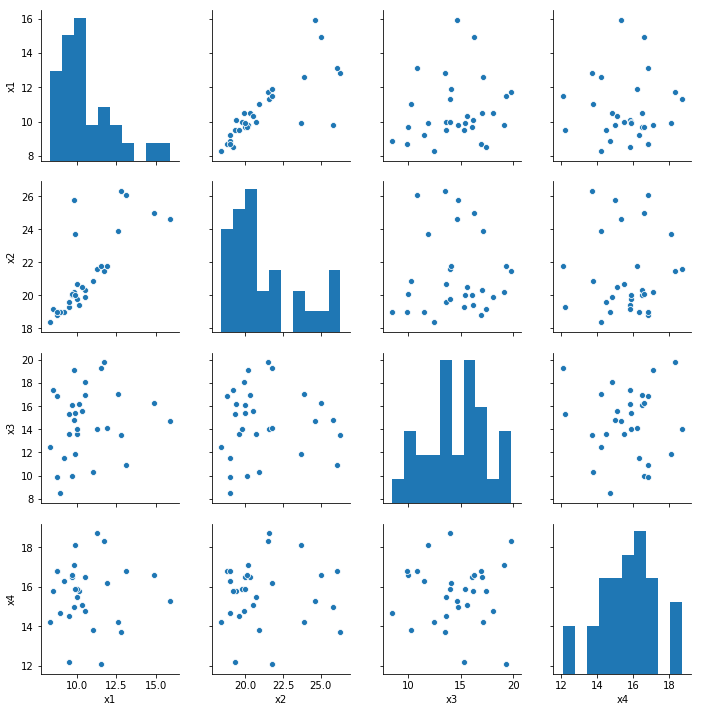

In [0]:

import seaborn as sns
sns.pairplot(df)

In [0]:
type(t_out)

list

In [0]:
plot_data = pd.DataFrame(np.array(t_out).reshape(328,))

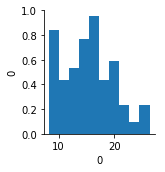

In [0]:
import seaborn as sns
sns.pairplot(plot_data)

C:\Users\anmol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


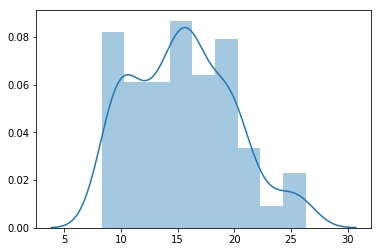

In [0]:
sns.distplot(plot_data)


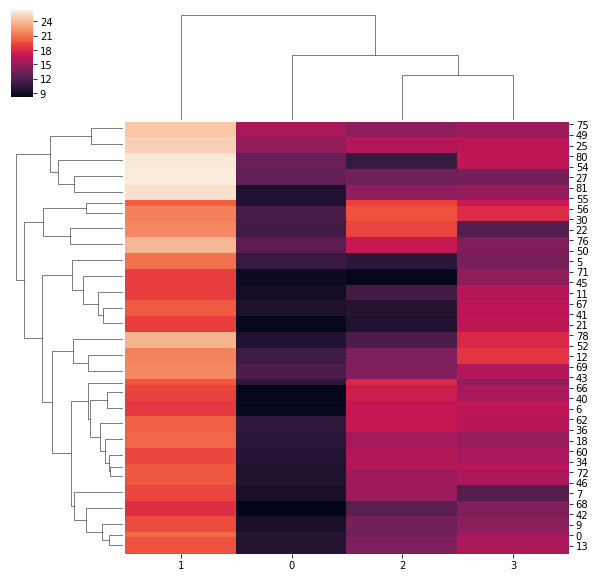

In [0]:
sns.clustermap(X)
# extra work not required.

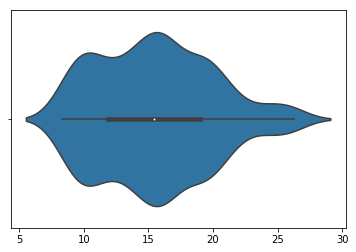

In [0]:
sns.violinplot([X])
# extra work not required.

# Problem 2

In [0]:
# Load the digit data
digits = datasets.load_digits()
# View the features of the first observation
digits.data[0:1]
# View the target of the first observation
digits.target[0:1]
# Create dataset 1
data1_features = digits.data[:1000]
data1_target = digits.target[:1000]

# Create dataset 2
data2_features = digits.data[1000:]
data2_target = digits.target[1000:]

In [0]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001,0.1,1,0.00001], 'kernel': ['rbf','linear']},
]

In [0]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(data1_features, data1_target) 

C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 0.1, 1, 1e-05], 'kernel': ['rbf', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# View the accuracy score
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.942


In [0]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 10
Best Kernel: rbf
Best Gamma: 0.001


## We can verify my code above by implementing the code for best parameter selection which is provided on scikit learn

In [0]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [0]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 